In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [9]:
df= pd.read_csv(r'C:\Users\USER\Downloads\Amazon Sale Report.csv')

In [11]:
df=df.drop(columns=['index'])

In [12]:
df.head()


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
128971    False
128972    False
128973    False
128974    False
128975    False
Length: 128976, dtype: bool

In [16]:
df.corr(numeric_only=True)

,Qty,Amount,ship-postal-code,B2B,New,PendingS
Qty,1.000000,0.066750,-0.010231,0.015810,NaN,NaN
Amount,0.066750,1.000000,-0.038423,0.015560,NaN,NaN
ship-postal-code,-0.010231,-0.038423,1.000000,-0.035792,NaN,NaN
B2B,0.015810,0.015560,-0.035792,1.000000,NaN,NaN
New,NaN,NaN,NaN,NaN,NaN,NaN
PendingS,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [19]:
df=df.drop(columns=['New','PendingS'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [28]:
df.corr(numeric_only=True)

,Qty,Amount,ship-postal-code,B2B
Qty,1.000000,0.066750,-0.010231,0.015810
Amount,0.066750,1.000000,-0.038423,0.015560
ship-postal-code,-0.010231,-0.038423,1.000000,-0.035792
B2B,0.015810,0.015560,-0.035792,1.000000


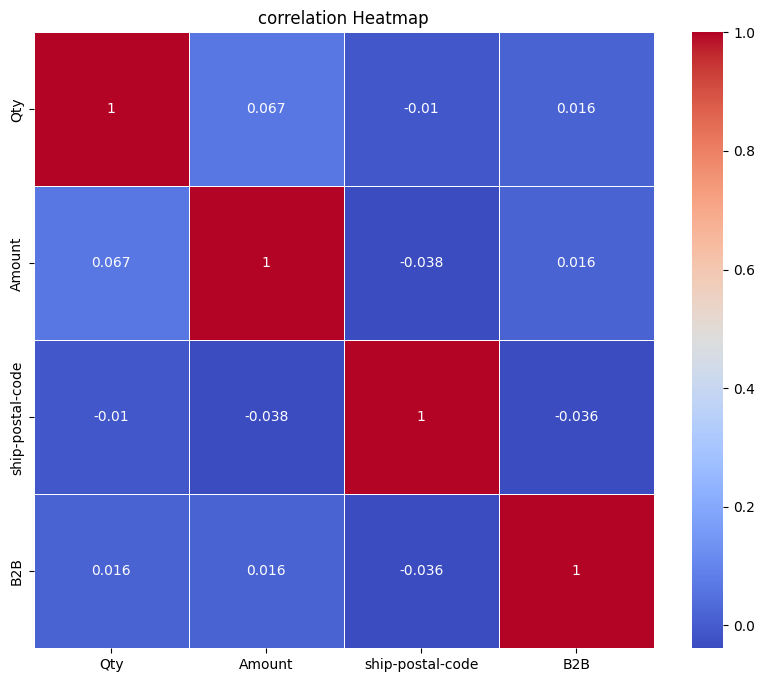

In [29]:
correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',linewidth=0.5)
plt.title('correlation Heatmap')
plt.show()

0.0.1 Understanding the overall sales performance,trends and pattern over time

In [31]:
#converting 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

In [37]:
#aggregate total sales and number of orders by date

sales_overview = df.groupby('Date').agg({'Amount':'sum','Order ID':'count'}).reset_index()
sales_overview.rename(columns={'Order ID':'Number of Orders'}, inplace=True)
print(sales_overview)


         Date      Amount  Number of Orders
0  2022-03-31   101683.85               171
1  2022-04-13   977017.30              1651
2  2022-04-14  1113487.56              1883
3  2022-04-15  1024542.13              1853
4  2022-04-16  1010056.23              1759
5  2022-04-17   940843.90              1604
6  2022-04-18   885403.46              1568
7  2022-04-19   960055.36              1678
8  2022-04-20  1091926.41              1850
9  2022-04-21   971966.58              1746
10 2022-04-22   978033.62              1657
11 2022-04-23  1093536.62              1816
12 2022-04-24  1082483.95              1810
13 2022-04-25   977764.88              1665
14 2022-04-26   907039.09              1560
15 2022-04-27   853801.58              1462
16 2022-04-28   836128.52              1416
17 2022-04-29   836000.89              1458
18 2022-04-30   973599.43              1678
19 2022-05-13   736609.76              1117
20 2022-05-14   768171.90              1210
21 2022-05-15   894645.67       

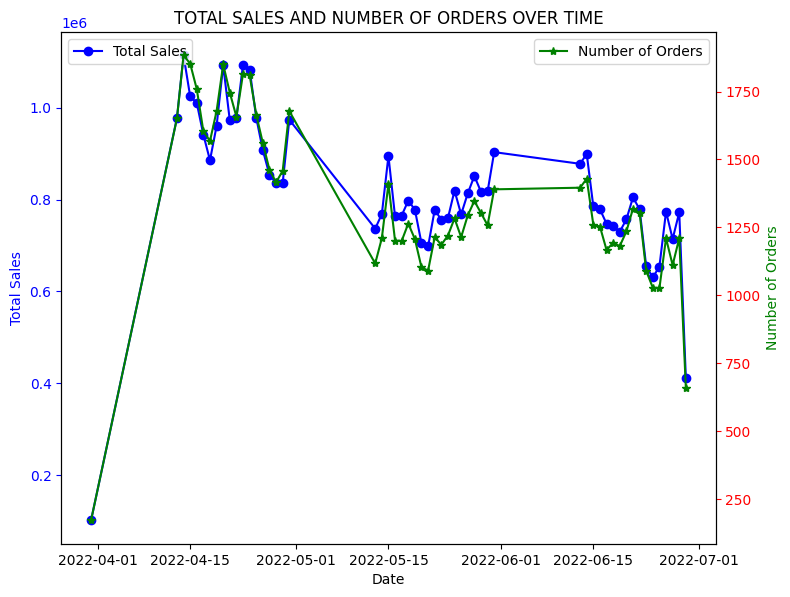

In [41]:
#plotting that sales and number of orders

fig, axl=plt.subplots(figsize=(8,6))

axl.plot(sales_overview['Date'], sales_overview['Amount'],color='b',marker='o', label='Total Sales')
axl.set_xlabel('Date')
axl.set_ylabel('Total Sales', color='b')
axl.tick_params('y',colors='b')
axl.legend (loc='upper left')

ax2=axl.twinx()
ax2.plot(sales_overview['Date'],sales_overview['Number of Orders'],color='g',marker='*',label='Number of Orders')
ax2.set_ylabel('Number of Orders', color='g')
ax2.tick_params('y',colors='r')
ax2.legend(loc='upper right')
fig.tight_layout()

plt.title('TOTAL SALES AND NUMBER OF ORDERS OVER TIME')
plt.show()



0.0.2 Analyzing the distribution of product categories,size,and quantites to identify popular products

C:\Users\USER\AppData\Local\Temp\ipykernel_1660\813126964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index,palette=custom_palette)
C:\Users\USER\AppData\Local\Temp\ipykernel_1660\813126964.py:3: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index,palette=custom_palette)


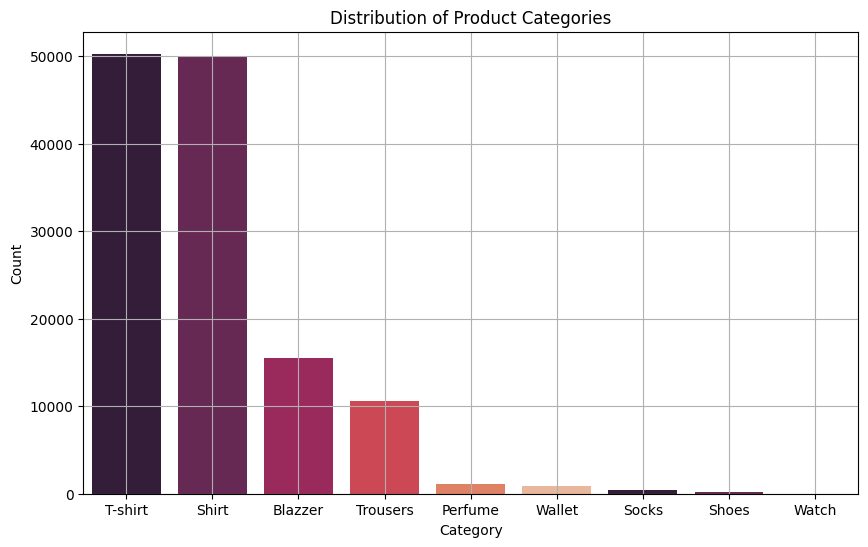

In [45]:
#Plotting distribution of product categories

custom_palette=sns.color_palette("rocket",6)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index,palette=custom_palette)

plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1660\3614574464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index,palette=custom_palette)
C:\Users\USER\AppData\Local\Temp\ipykernel_1660\3614574464.py:3: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index,palette=custom_palette)


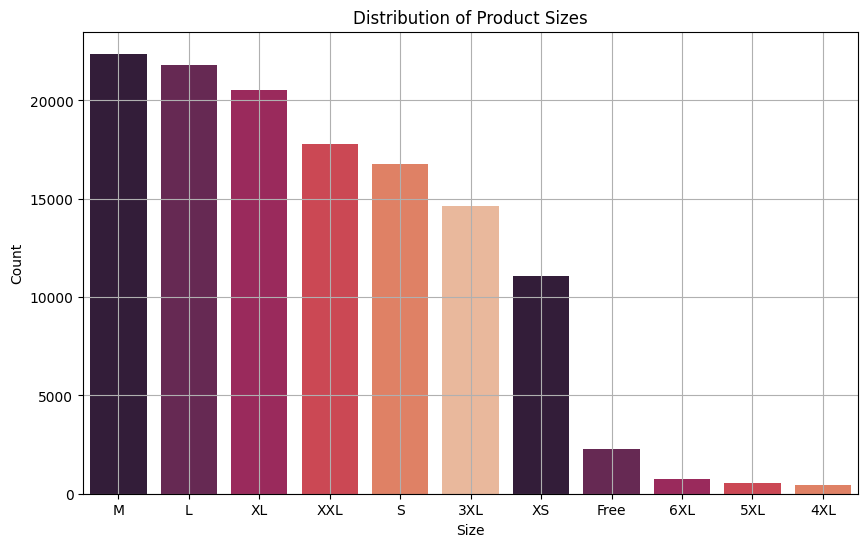

In [46]:
#plotting distributions of produc size

custom_palette = sns.color_palette("rocket",6)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index,palette=custom_palette)

plt.title('Distribution of Product Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.grid(True)
plt.show()

0.0.3 Investigate the fulfllment methods used and their effectiveness in delivering orders.

C:\Users\USER\AppData\Local\Temp\ipykernel_1660\4090757921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Fulfilment', order=df['Fulfilment'].value_counts().index,palette=custom_palette)
C:\Users\USER\AppData\Local\Temp\ipykernel_1660\4090757921.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Fulfilment', order=df['Fulfilment'].value_counts().index,palette=custom_palette)


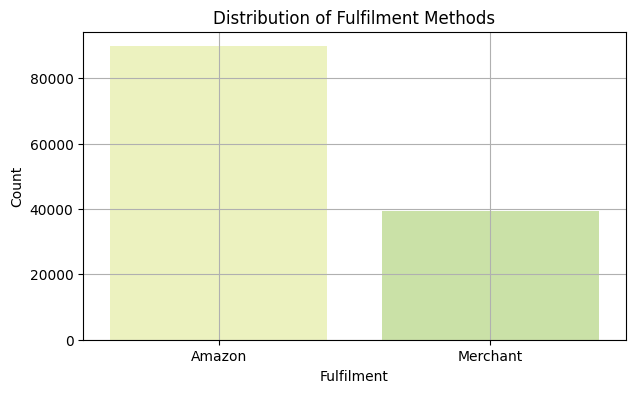

In [49]:
custom_palette = sns.color_palette("YlGn",6)
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='Fulfilment', order=df['Fulfilment'].value_counts().index,palette=custom_palette)

plt.title('Distribution of Fulfilment Methods')
plt.xlabel('Fulfilment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<Figure size 600x400 with 0 Axes>

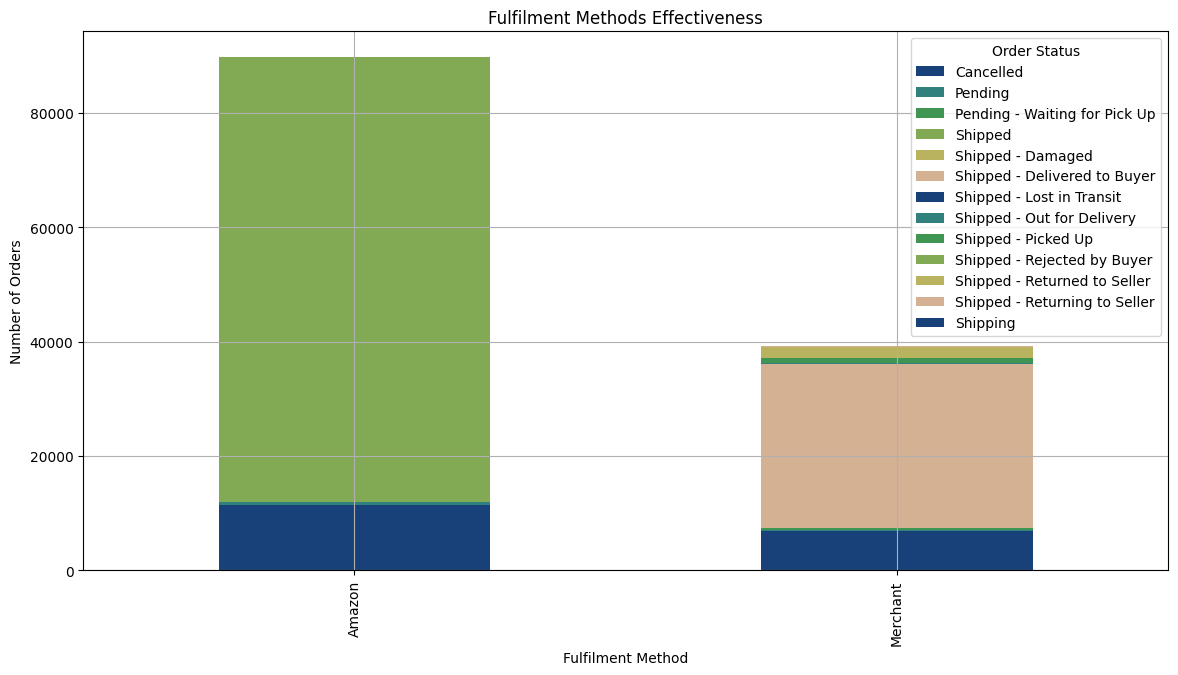

In [55]:
#analyzing the effectiveness based on "Status"

custom_palette=sns.color_palette("gist_earth",6)
plt.figure(figsize=(6,4))
fulfillment_effectiveness= df.groupby(['Fulfilment','Status']).size().unstack().fillna(0)
fulfillment_effectiveness.plot(kind='bar', stacked=True,figsize=(14,7),color=custom_palette)


plt.title('Fulfilment Methods Effectiveness')
plt.xlabel('Fulfilment Method')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend(title='Order Status')
plt.show()

0.0.4:Segment customer based on their buying behaviour, location and other relevant factors.

C:\Users\USER\AppData\Local\Temp\ipykernel_1660\2225355627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_segmentation, x='State',y='Number of Orders', palette=custom_palette)
C:\Users\USER\AppData\Local\Temp\ipykernel_1660\2225355627.py:6: UserWarning: 
The palette list has fewer values (6) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=state_segmentation, x='State',y='Number of Orders', palette=custom_palette)


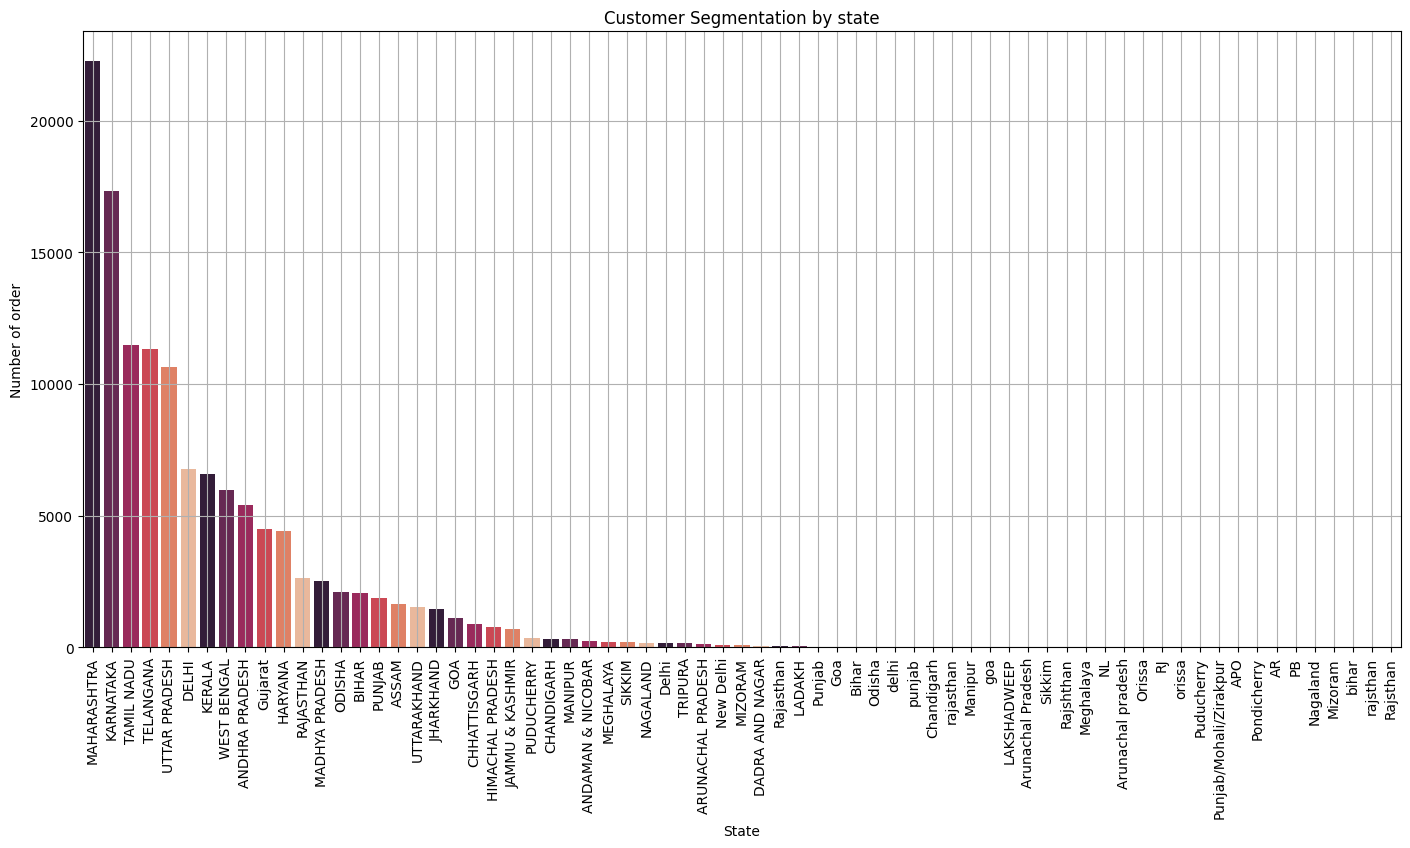

In [58]:
#segmentation by state

state_segmentation=df['ship-state'].value_counts().reset_index()
state_segmentation.columns=['State','Number of Orders']

custom_palette=sns.color_palette("rocket",6)
plt.figure(figsize=(17,8))
sns.barplot(data=state_segmentation, x='State',y='Number of Orders', palette=custom_palette)

plt.title('Customer Segmentation by state')
plt.xlabel('State')
plt.ylabel("Number of order")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

0.0.5 Explore the geographical distribution of sales,focusing on states and cities

In [59]:
#Aggregate sales by state and city

geo_sales=df.groupby(['ship-state', 'ship-city']).agg({'Amount':'sum'}).reset_index()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1660\865982483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='ship-state', y='Amount',palette=custom_palette)
C:\Users\USER\AppData\Local\Temp\ipykernel_1660\865982483.py:6: UserWarning: 
The palette list has fewer values (6) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=state_sales, x='ship-state', y='Amount',palette=custom_palette)


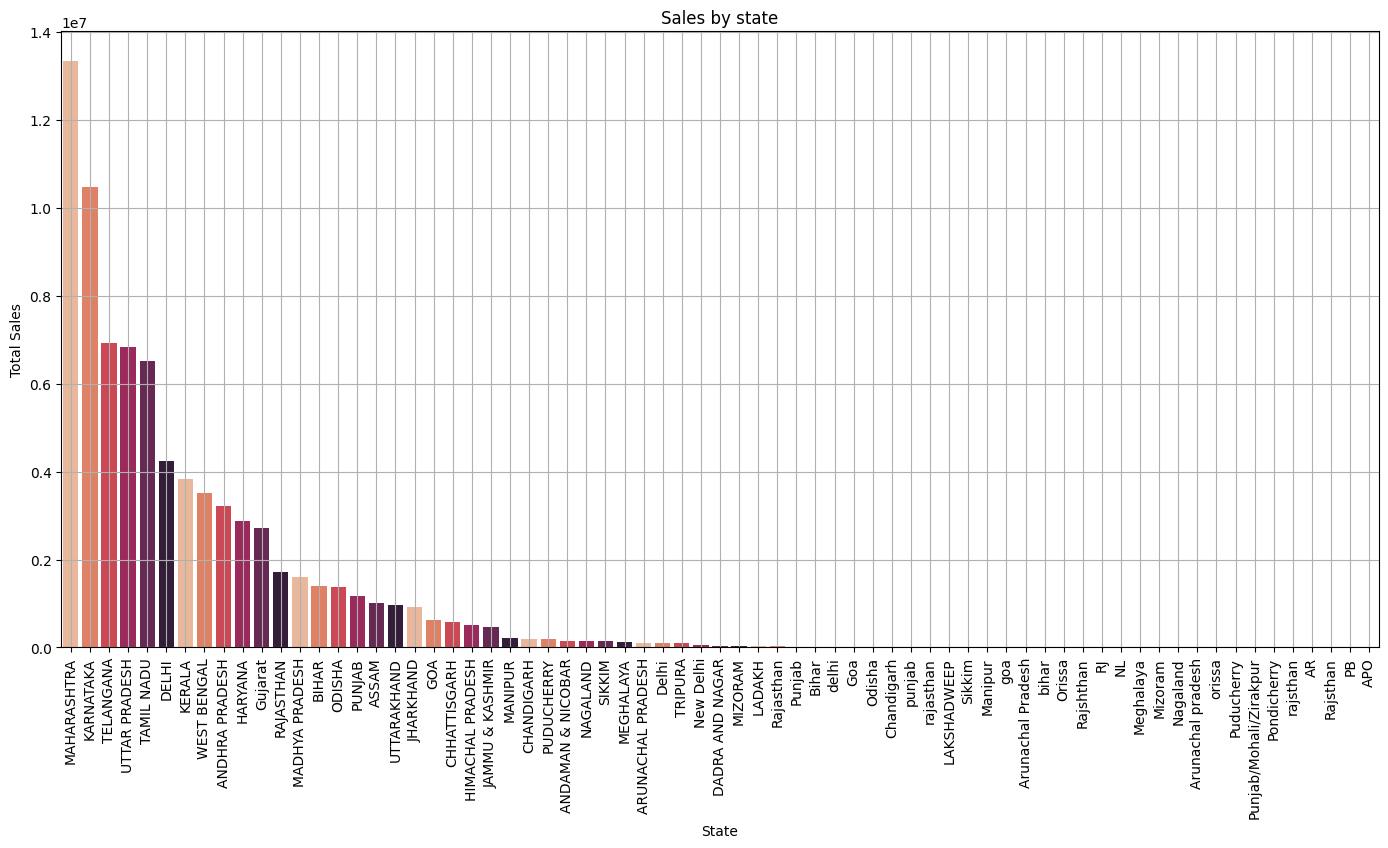

In [62]:
#plotting sales by state

state_sales=geo_sales.groupby('ship-state').agg({'Amount':'sum'}).reset_index()
state_sales=state_sales.sort_values('Amount',ascending= False)

custom_palette=sns.color_palette("rocket_r",6)
plt.figure(figsize=(17,8))
sns.barplot(data=state_sales, x='ship-state', y='Amount',palette=custom_palette)
            

plt.title('Sales by state')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1660\1155394240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='ship-city', y='Amount',palette=custom_palette)
C:\Users\USER\AppData\Local\Temp\ipykernel_1660\1155394240.py:7: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=state_sales, x='ship-city', y='Amount',palette=custom_palette)


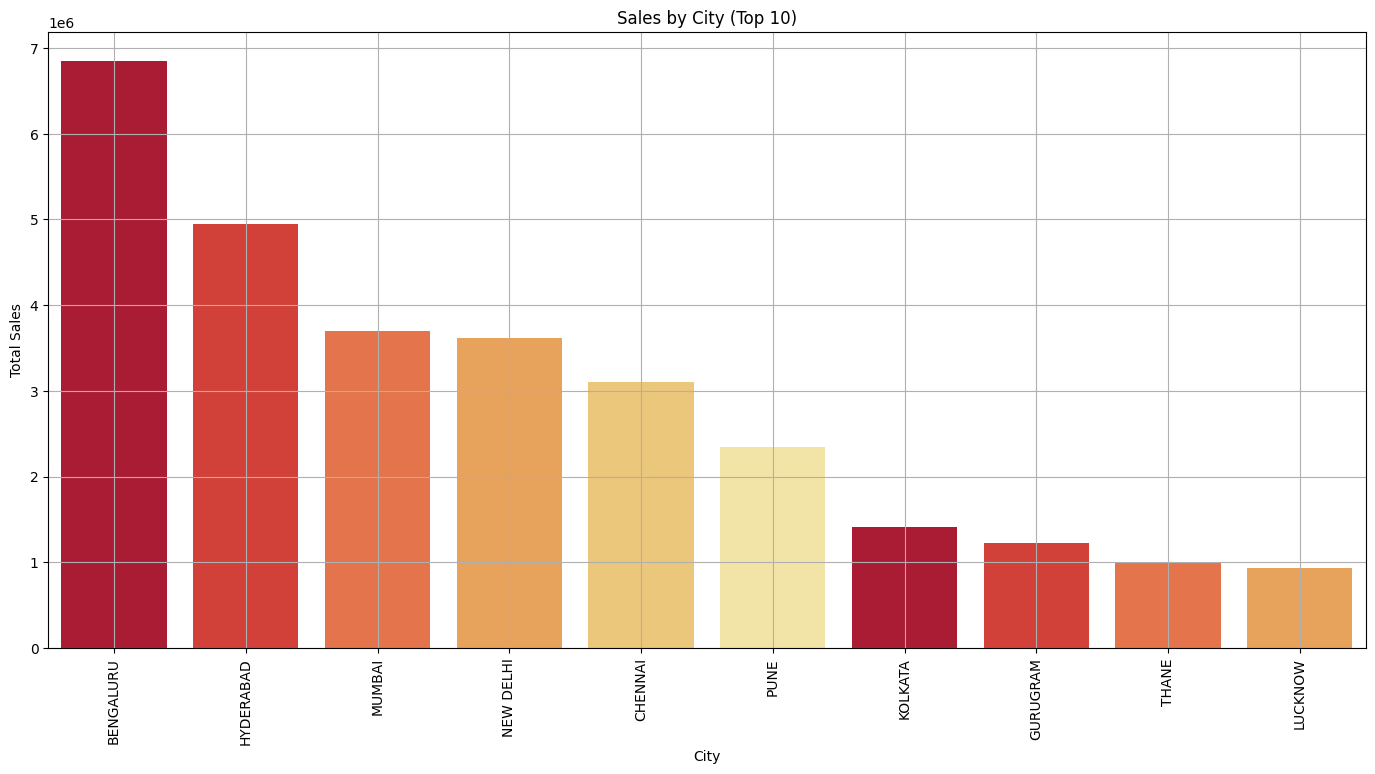

In [63]:
#plotting sales by city(top 10 cities)

state_sales = geo_sales.groupby('ship-city').agg({'Amount':'sum'}).reset_index()

state_sales = state_sales.sort_values('Amount', ascending=False).head(10)

custom_palette = sns.color_palette('YlOrRd_r',6)
plt.figure(figsize=(17,8))
sns.barplot(data=state_sales, x='ship-city', y='Amount',palette=custom_palette)

plt.title('Sales by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()